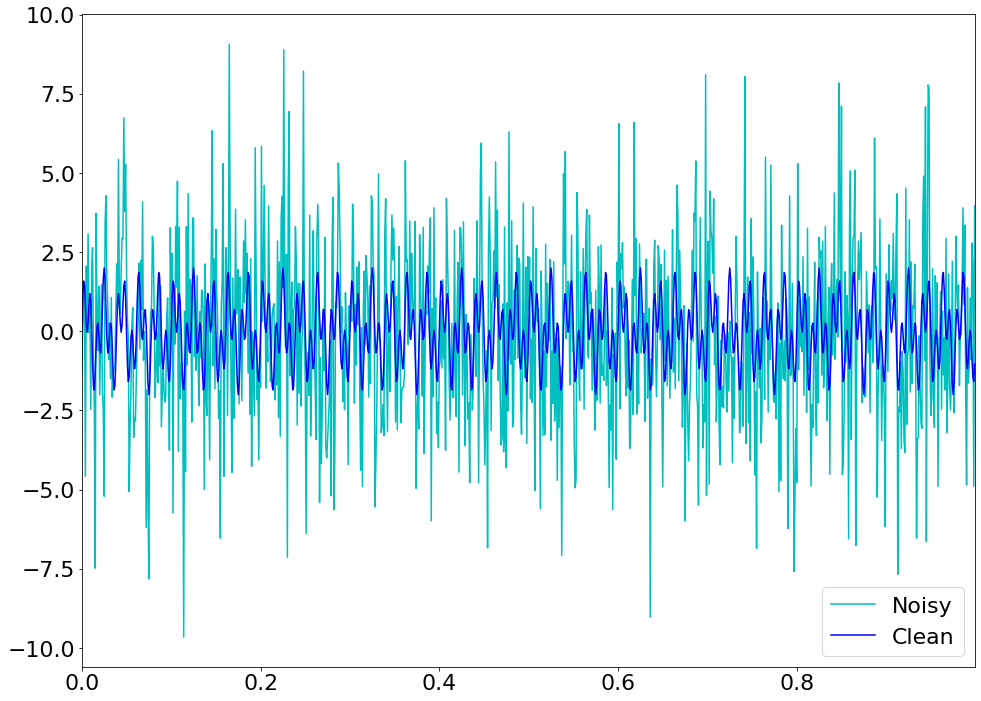

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 22})

dt = 0.001
# time vector
t = np.arange(0,1,dt)
# original clean signal
f_clean = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*130*t)
# noise added to signal
f = f_clean + 2.5*np.random.randn(len(t))

# plot of the signal alongside noise
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='b',LineWidth=1.5,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

/home/sidrag/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


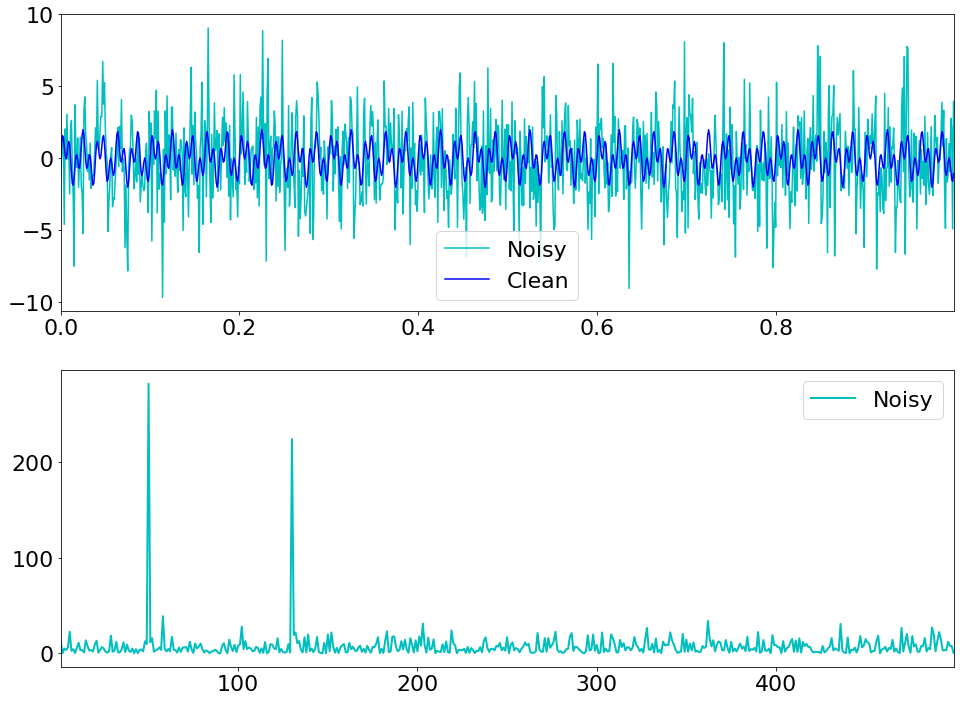

In [12]:
n = len(t)

# fft of the signal f
f_hat = np.fft.fft(f,n)
# Power Spectral Density(PSD)
PSD = f_hat * np.conj(f_hat) / n
# frequency vector corresponding to the time vector 't'
freq = (1/(dt*n)) * np.arange(n)
# plotting the first half only
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='b',LineWidth=1.5,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

## The above graph tells us that most of the power in the signal is at 50hz and 130hz 

In [17]:
# Using PSD to filter out noise

# find fft with large power
indices = PSD>100
# Zeroing out all others
PSD_clean = PSD * indices
# Zeroing out small Fourier coefficients in Y
f_hat = indices * f_hat
# Inverse FFT for filtered time signal
inverse_fft = np.fft.ifft(f_hat)


/home/sidrag/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


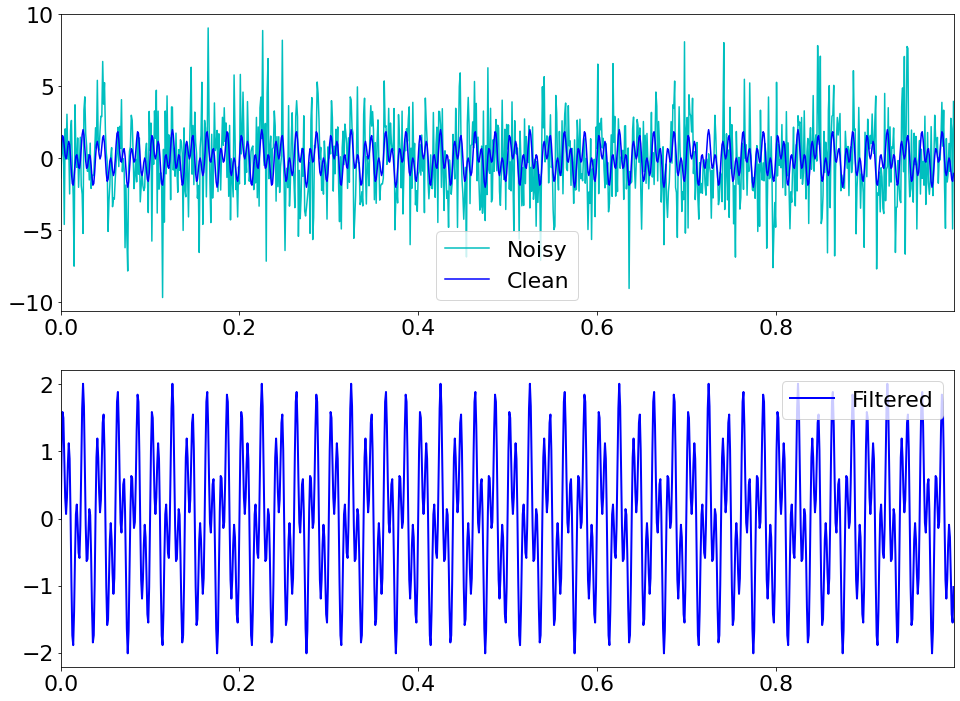

In [19]:
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='b',LineWidth=1.5,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,inverse_fft,color='b',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()